<a href="https://colab.research.google.com/github/CSpanias/spam_filter_bootcamp/blob/master/spam_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM FILTER**
*Author: [Charalampos Spanias](https://github.com/CSpanias)*

## This project was developed as an assignment for:
  * [Skills Bootcamp in Artificial Intelligence](https://instituteofcoding.org/skillsbootcamps/course/skills-bootcamp-in-artificial-intelligence/).

## This code is mainly based on: 
  * [Email Spam Detection Using Python & Machine Learning](https://www.youtube.com/watch?v=cNLPt02RwF0&list=WL&index=4&t=12s)
	

## It was modified based on:
  * [Spam or Ham tutorial](https://github.com/tejank10/Spam-or-Ham/blob/master/spam_ham.ipynb)

  * [SVM Classifier tutorial](https://www.kaggle.com/prashant111/svm-classifier-tutorial/notebook)

  * [Sololearn (Machine Learning path)](https://www.sololearn.com/learning/1094)

  * [Machine Learning for Absolute Beginners book](https://www.amazon.co.uk/Machine-Learning-Absolute-Beginners-Introduction-ebook/dp/B08RWBSKQB)

# **CONTENT**

1. [Data Cleaning](#DataCleaning)
2. [Object Manipulation (nltk)](#nltk)
3. [Naive-Bayes](#Naive-Bayes)
  * [K-Fold Cross Validation](#NBkfold)
  * [Model Evaluation](#NB-Eval)

4. [Support Vector Machine](#SVM)
  * [K-Fold Cross Validation](#SVCkfold)
  * [Hyperparameter Optimization (GridSearchCV)](#GridSearchCV)
  * [Model Evaluation](#GS-Eval)

5. [Results & Conclusions](#Res-Con)



Import the required libraries:
  1. ***pandas*** for importing dataset(*)
  2. ***matplotlib***, ***seaborn*** & ***IPython*** for visualisation
  3. ***string*** & ***nltk*** for object manipulation
  4. ***sklearn*** for machine learning
  5. ***wordcloud*** for wordcloud visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

from IPython.display import display

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_validate

from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, log_loss
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, brier_score_loss, make_scorer

In [2]:
# read the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/CSpanias/spam_filter_bootcamp/master/emails.csv')

# print the first 5 rows of data
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


<a name="DataCleaning"> </a>
# **Data Cleaning Process**

  * Duplicates
  * Missing values

In [3]:
# print the number of rows and columns
df.shape

(5728, 2)

In [4]:
# check for duplicates
df.duplicated().sum()

33

In [5]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [6]:
# check for missing values
df.isna().sum()

text    0
spam    0
dtype: int64

<a name="nltk"> </a>
# **Object Manipulation Process**

  1. Remove punctuation from text
  2. Remove stopwords from text
  3. Split text in individual words

More info about nltk and Natural Language Processing (NLP) [here](https://www.nltk.org/book/?fbclid=IwAR1q2paswiXV1dMllJyKBxXmIVgbnes_KD3YKg4Kko6V_T4_nVXKjcYMyDE).

Define a function that:
  1. Removes punctuation symbols and stopwords from a text
  2. Splits the text into individual words
  3. Stores the individual words in a list

In [7]:
def process_text(text):
	"""
		Returns a list of strings (individual words) of a text (paragraph) excluding
		punctuation, stopwords.

			Parameters
			----------
				text: An object (string) variable.

			Returns
			-------
				clean_words: A list of objects (string).
	"""
	# create an empty list to later store the rows (emails) without punctuation
	no_punctuation = []
	# create an empty list to later store the words of each row (email)
	clean_words = []
	# for every row (email) in the text column
	for char in text:
		# remove every punctuation symbol
		if char not in string.punctuation:
			# append the free-of-punctuation row in the list "no_punctuation"
			no_punctuation.append(char)
	# insert an empty space between words
	no_punctuation = ''.join(no_punctuation)

	# for every row (email without punctuation symbols) in
	# the "no_punctuation" list split the text into words
	for word in no_punctuation.split():
		# convert every word in lowercase
		word = word.lower()
		# if this word is not a stopword
		if word not in stopwords.words('english'):
			# append the free-of-stopwords words in the list "clean_words"
			clean_words.append(word)
	# give back the list "clean_words"
	return clean_words

Apply the function "process_text" to the column "text" so we end up with a column of individual words and print the first 5 rows.

In [8]:
import nltk
nltk.download('stopwords')

df['text'].head().apply(process_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [subject, naturally, irresistible, corporate, ...
1    [subject, stock, trading, gunslinger, fanny, m...
2    [subject, unbelievable, new, homes, made, easy...
3    [subject, 4, color, printing, special, request...
4    [subject, money, get, software, cds, software,...
Name: text, dtype: object

***CountVectorizer*** transforms a given text into a vector on the basis of 
the frequency (count) of each word that occurs in the entire text. 

More info on how it works [here](https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/).

In [9]:
# convert a collection of text to a matrix of tokens (*bow = bog of words)
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

Create a **wordcloud visualisation** for the spam words.

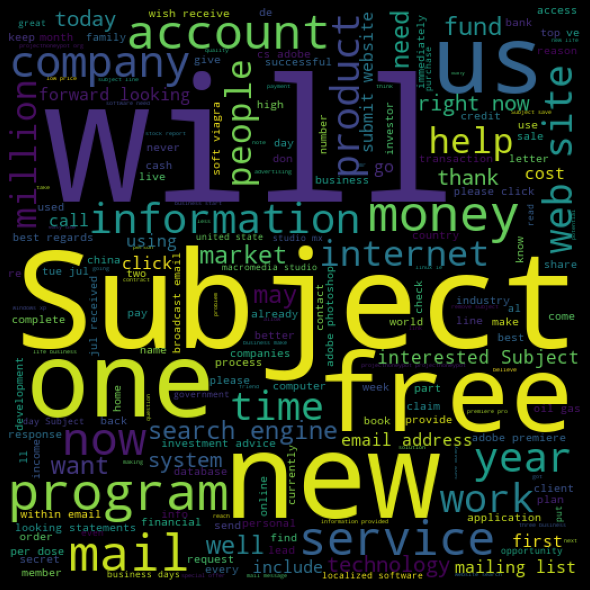

In [10]:
spam_wordcloud = WordCloud(width=512, height=512).generate(' '.join(df['text'][df['spam']==1]))
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<a name="training"> </a>
# **Model Training Process**

In [11]:
# assign X and y variables
X = messages_bow
y = df['spam']

In [12]:
# get the shape of X (rows, columns)
X.shape

(5695, 37228)

<a name="NaiveBayes"> </a>
# **Naive-Bayes**

Why Naive-Bayes?
  1. Binary classification task.
  2. Features are independent.

Which Naive-Bayes?
  1. **Multinomial** 
    * Assumes data is multinomially distributed.
    * Primarily used for document classification tasks based on ***word frequency***! Relevant?
  2. **Bernoulli**
    * Similar to Multinomial, but the features are ***independent Boolean variables***.
    * For example, if a word is present is not! More suitable for our task?
  3. **Complemenent** 
    * An adaptation of the multinomial naive Bayes algorithm that is particularly suited for ***imbalanced data sets***!

<a name="NBkfold"></a>
# **K-Fold Cross-Validation**

**K-fold cross-validation** is a very useful technique to evaluate model 
performance. Instead of doing a single training-test split, we split our dataset multiple times.

The reasons behind K-Fold are:
  1. A certain split selected randomly at the start (*random_state=10*) may not be optimal. 
  2. The test set generated from that split is never used to evaluate the model.

<img src="https://miro.medium.com/max/875/1*rgba1BIOUys7wQcXcL4U5A.png" alt="drawing" width="500"/>

But, it fails here because we have a ***imbalanced dataset***, so instead ***stratified k-fold cross-validation*** will be used. In the latter, the dataset is split such that the proportions between classes are the same in each fold as they are in the whole dataset.

<img src="https://miro.medium.com/max/875/1*D9OJZ-n0xh9d87i58WfMLQ.png" alt="drawing" width="500"/>

In [13]:
# select the model(s)
model_mnb = MultinomialNB()
model_ber = BernoulliNB()
model_com = ComplementNB()

# choose how many train/test sets we want by "n_splits"
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=44)

# calculate the accuracy score of each of the 5 train/test sets
mnb_scores = cross_val_score(model_mnb, X, y, cv=kfold)
ber_scores = cross_val_score(model_ber, X, y, cv=kfold)
com_scores = cross_val_score(model_com, X, y, cv=kfold)

# print average cross-validation scores
print('\nAverage stratified cross-validation score with Multinomial NB:',
      round(mnb_scores.mean(), 4))
print('Average stratified cross-validation score with Bernoulli NB:',
      round(ber_scores.mean(), 4))
print('Average stratified cross-validation score with Complement NB:',
      round(com_scores.mean(), 4))
print('')
# convert list of scores to dataframe
mnb_splits = pd.DataFrame(mnb_scores, columns = ['Individual splits for MNB'])


Average stratified cross-validation score with Multinomial NB: 0.9902
Average stratified cross-validation score with Bernoulli NB: 0.9856
Average stratified cross-validation score with Complement NB: 0.99



In [14]:
# display dataframe as a table
display(mnb_splits)

,Individual splits for MNB
0,0.984211
1,0.992982
2,0.987719
3,0.987719
4,0.991228
5,0.989455
6,0.987698
7,0.992970
8,0.994728
9,0.992970


<a name="NB-Eval"> </a>
# **Model Evalution**
1. Null accuracy
2. Extended Classification Report
3. Confusion Matrix

<a name="NullAccuracy"> </a>
Calculate **null accuracy** (*the accuracy that could be achieved by always predicting the most frequent class*) and compare it with the Multinomial Naive-Bayes model's accuracy.

  *A model that predicts everything as ham on a dataset with 9,900 ham and 100 spam emails will have: (9,900 / 10,000) = **0.99 accuracy**!*

In [15]:
# check class distribution in test set
print(y.value_counts())
# check null accuracy score
null_accuracy = round(4327/(1368+4327), 4)
print('Null accuracy score:', null_accuracy)

0    4327
1    1368
Name: spam, dtype: int64
Null accuracy score: 0.7598


Average CV testing accuracy with Multinomial Naive-Bayes: **0.9902** > Null accuracy: **0.7598**.

<a name="ClassificationReport"> </a>
Generate **extended Classification report** (*an overview of different scores*):

  * **Accuracy**: $\frac{CorrectlyPredicted}{Total}$ 
    * the simplest score
    * can be misleading as a sole metric
  
  * **Precision**: $\frac{TruePositives}{All Positives (TP+FP)}$ 
    * the ability of the classifier not to label as positive a sample that is negative
    * how precise is with its positive predictions.
 

  * **Recall/Sensitivity**: $\frac{TruePositive}{TruePositive + FalseNegative}$
    * the ability of the classifier to find all the positive samples  
    * how many of the positive cases can recall
  
  * **F1-score**: $2x\frac{PrecisionxRecall}{Precision+Recall}$
    * a weighted harmonic mean of the precision and recall 
  
  * **Support**:
    * the number of occurrences of each class in y_true

  * **Macro-average**: 
    * unweighted mean per label
  * **Weighted-average**: 
    * averaging the support-weighted mean per label

Define desired metrics and cross validate:

In [16]:
# choose how many train/test sets we want by "n_splits"
kf = StratifiedKFold(n_splits=10, shuffle=True)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'neg_brier_score', 'neg_log_loss', 'roc_auc']

scores_mnb = cross_validate(model_mnb, X, y, cv=kf, scoring=scoring, return_train_score=True)

Extract the desired metrics, calculate mean scores and display them in a table.

In [17]:
accuracy_train = []
accuracy_splits = []
precision_splits = []
recall_splits = []
f1_splits = []
brier_splits = []
logloss_splits = []
rocauc_splits = []
for key, value in scores_mnb.items():
  if key == 'train_accuracy':
    accuracy_train.append(value)
  if key == 'test_accuracy':
    accuracy_splits.append(value)
  if key == 'test_precision':
    precision_splits.append(value)
  if key == 'test_recall':
    recall_splits.append(value)
  if key == 'test_f1':
    f1_splits.append(value)
  if key == 'test_neg_brier_score':
    brier_splits.append(value)
  if key == 'test_neg_log_loss':
    logloss_splits.append(value)
  if key == 'test_roc_auc':
    rocauc_splits.append(value)


# set column names
split_cols_names = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5',
                    'split 6', 'split 7', 'split 8', 'split 9', 'split 10']

# convert lists of scores to dataframe
accuracy_train = pd.DataFrame(accuracy_train, columns=split_cols_names )
accuracy_splits = pd.DataFrame(accuracy_splits, columns=split_cols_names)
precision_splits = pd.DataFrame(precision_splits, columns=split_cols_names)
recall_splits = pd.DataFrame(recall_splits, columns=split_cols_names)
f1_splits = pd.DataFrame(f1_splits, columns=split_cols_names)
brier_splits = pd.DataFrame(brier_splits, columns=split_cols_names)
logloss_splits = pd.DataFrame(logloss_splits, columns=split_cols_names)
rocauc_splits = pd.DataFrame(rocauc_splits, columns=split_cols_names)

# rename rows
accuracy_train.rename(index = {0: "Accuracy Train"}, inplace=True)
accuracy_splits.rename(index = {0: "Accuracy"}, inplace=True)
precision_splits.rename(index = {0: "Precision"}, inplace = True)
recall_splits.rename(index = {0: "Recall"}, inplace = True)
f1_splits.rename(index = {0: "F1"}, inplace = True)
brier_splits.rename(index = {0: "Brier"}, inplace = True)
logloss_splits.rename(index = {0: "LogLoss"}, inplace = True)
rocauc_splits.rename(index = {0: "RocAuc"}, inplace = True)


# merge all dataframes into a single one
metrics_mnb = pd.concat([accuracy_train, accuracy_splits, precision_splits, recall_splits, f1_splits,
                     brier_splits, logloss_splits, rocauc_splits])

# calculate mean scores for each row
mean_scores = metrics_mnb.mean(axis=1)

# append column to the dataframe
metrics_mnb['mean'] = round(mean_scores, 4)

In [18]:
# display dataframe as a table
display(metrics_mnb)

,split 1,split 2,split 3,split 4,split 5,split 6,split 7,split 8,split 9,split 10,mean
Accuracy Train,0.997073,0.996878,0.997268,0.997659,0.996488,0.997269,0.996879,0.996488,0.997074,0.997659,0.9971
Accuracy,0.989474,0.996491,0.992982,0.987719,0.987719,0.992970,0.989455,0.994728,0.985940,0.987698,0.9905
Precision,0.978102,0.985612,0.971631,0.951389,0.957746,0.978417,0.958042,0.978571,0.963768,0.957447,0.9681
Recall,0.978102,1.000000,1.000000,1.000000,0.992701,0.992701,1.000000,1.000000,0.977941,0.992647,0.9934
F1,0.978102,0.992754,0.985612,0.975089,0.974910,0.985507,0.978571,0.989170,0.970803,0.974729,0.9805
Brier,-0.008841,-0.003908,-0.007594,-0.012228,-0.010736,-0.007029,-0.010069,-0.005235,-0.011261,-0.011476,-0.0088
LogLoss,-0.051975,-0.103158,-0.156741,-0.212865,-0.120420,-0.081957,-0.256788,-0.086767,-0.215555,-0.276938,-0.1563
RocAuc,0.999629,0.998306,0.996983,0.996527,0.998129,0.998454,0.994306,0.998547,0.995941,0.993929,0.9971


<a name="ConfusionMatrix"> </a>
4. Generate & visualize the **Confusion Matrix**: describes how a model performs on a dataset.

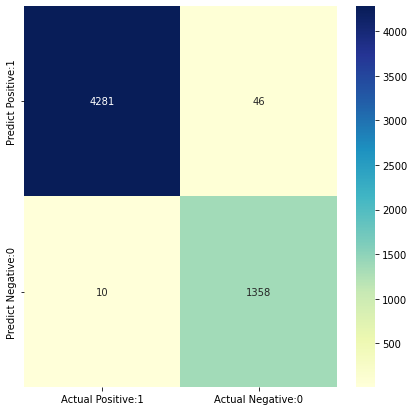

In [19]:
y_pred = cross_val_predict(model_mnb, X, y, cv=kf)
cm = confusion_matrix(y, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1',
                                           'Actual Negative:0'],
                        index=['Predict Positive:1', 'Predict Negative:0'])
fig, ax = plt.subplots(figsize=(7,7))  
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

* **Missclassifications**:
  * ***Only 10 spam email as ham***!
  * 46 ham emails as spam.

<a name="SVM"> </a>
# **Support Vector Machine**

* K-Fold Cross Validation
* Hyperparameter Optimization (GridSearchCV)
* Model Evaluation

Why Support Vector Machine?
  1. Classification task with categorical outcome.

Why not SVM?
  1. Not recommended for datasets with low feature-to-row ratio!  
  
  $\frac{37228}{5695}= 6.62$

<a name='SVCkfold'> </a>
# **K-Fold Cross Validation**
Perform a **KFold Cross-Validation** on the **default SVC model**.

In [20]:
# choose how many train/test sets we want by "n_splits"
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# instantiate SVM model with default parameters
svc = SVC()

# calculate the accuracy score of each of the 5 train/test sets
svc_scores = cross_validate(svc, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

Extract train and test scores for each split, calculate mean and display them as a table.

In [21]:
train_splits = []
test_splits = []
for key, value in svc_scores.items():
  if key == 'train_score':
    train_splits.append(value)
  if key == 'test_score':
    test_splits.append(value)

# set column names
split_cols_names = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5',
                    'split 6', 'split 7', 'split 8', 'split 9', 'split 10']

# convert lists of scores to dataframe
train_scores = pd.DataFrame(train_splits, columns=split_cols_names)
test_scores = pd.DataFrame(test_splits, columns=split_cols_names)

# rename rows
train_scores.rename(index = {0: "Accuracy (Train)"}, inplace = True)
test_scores.rename(index = {0: "Accuracy (Test)"}, inplace = True)

# merge both dataframes into a single one
data = train_scores.append(test_scores)

# calculate mean scores
mean_scores = data.mean(axis=1)

# append column to the dataframe
data['mean'] = round(mean_scores, 4)
# display dataframe as a tables
display(data)

,split 1,split 2,split 3,split 4,split 5,split 6,split 7,split 8,split 9,split 10,mean
Accuracy (Train),0.990634,0.991415,0.991220,0.990049,0.990049,0.989465,0.990636,0.990831,0.993172,0.989856,0.9907
Accuracy (Test),0.971930,0.970175,0.966667,0.978947,0.985965,0.980668,0.971880,0.982425,0.989455,0.978910,0.9777


<a name="GridSearchCV"></a>
# **Hyperparameter Optimization Using GridSearchCV**

GridSearchCV has four parameters:
  1. The model
  2. Param_grid: a dictionary of the parameters names and all the possible values
  3. What metric to use (default is accuracy)
  4. How many folds for k-fold cross validation

More info about GridSearch [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

**Support Vector Machine Hyperparameters**:
  1. **C**: margin width, lower value = soft margin / high value = hard margin
  2. **kernels**: more info about kernel types [here](https://scikit-learn.org/stable/modules/svm.html#svm-kernels).
  3. **gamma**: controls the influence of new Xs on the decision boundary, lower value = less/ higher value = more.

More info about SVM parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [24]:
# instantiate classifier with default parameters (kernel='rbf', C=1.0, gamma='scale')
svc = SVC()

# declare parameters for hyperparameter tuning
params = [
          {'C': [0.1, 1, 10], 'kernel':['linear']},
          {'C': [0.1, 1, 10], 'kernel': ['poly'], 'degree': [2,3], 
           'gamma': [0.05, 0.09]}
          ]

# create a dictionary for multiple scoring
scoring = {
            "accuracy": make_scorer(accuracy_score),
            "f1-score": make_scorer(f1_score)
           }

# create the grid search object
gs = GridSearchCV(svc, params, scoring=scoring, cv=kf, return_train_score=True, refit='accuracy', n_jobs=1, verbose=3)

# fit the gs object
gs.fit(X, y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END C=0.1, kernel=linear; accuracy: (train=1.000, test=0.989) f1-score: (train=1.000, test=0.978) total time=   4.8s
[CV 2/10] END C=0.1, kernel=linear; accuracy: (train=1.000, test=0.988) f1-score: (train=1.000, test=0.974) total time=   2.9s
[CV 3/10] END C=0.1, kernel=linear; accuracy: (train=1.000, test=0.986) f1-score: (train=1.000, test=0.971) total time=   3.1s
[CV 4/10] END C=0.1, kernel=linear; accuracy: (train=1.000, test=0.982) f1-score: (train=1.000, test=0.964) total time=   2.9s
[CV 5/10] END C=0.1, kernel=linear; accuracy: (train=1.000, test=0.982) f1-score: (train=1.000, test=0.963) total time=   3.0s
[CV 6/10] END C=0.1, kernel=linear; accuracy: (train=1.000, test=0.984) f1-score: (train=1.000, test=0.968) total time=   3.1s
[CV 7/10] END C=0.1, kernel=linear; accuracy: (train=1.000, test=0.993) f1-score: (train=1.000, test=0.986) total time=   2.9s
[CV 8/10] END C=0.1, kernel=linear; accuracy: (t

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=SVC(), n_jobs=1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'gamma': [0.05, 0.09], 'kernel': ['poly']}],
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1-score': make_scorer(f1_score)},
             verbose=3)

<a name="GS-Eval"></a>
# **Model Evaluation**

Assess the hyperparameter optimization with GridSearch for Support Vector Machine.

* The **best_score_** attribute gives the **training mean cross-validation score**.
* The **score method** on the test-set gives the **testing mean cross-validation score**, i.e. the **generalization performance of the model**.

In [27]:
# print estimator that was chosen by the GridSearch
print('\nEstimator that was chosen by the search:', gs.best_estimator_)

# get the model with the mean cross-validation training accuracy
print('\nGS model vs. default model training accucary:', round(gs.best_score_, 4),'vs. 0.9906')

# calculate GridSearch CV score
print('\nGS model vs. default model testing accuracy:', round(gs.score(X, y), 4), 'vs. 0.9780')


Estimator that was chosen by the search: SVC(C=0.1, kernel='linear')

GS model vs. default model training accucary: 0.987 vs. 0.9906

GS model vs. default model testing accuracy: 0.9998 vs. 0.9780


Evaluate the model proposed by GridSeachCV on different metrics.

Info on GS with multiple scoring metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring).

In [28]:
# choose how many train/test sets we want by "n_splits"
kf = StratifiedKFold(n_splits=10, shuffle=True)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'neg_brier_score', 'neg_log_loss', 'roc_auc']

model_gs = SVC(kernel='linear', C=0.1, probability=True)

scores_gs = cross_validate(model_gs, X, y, cv=kf, scoring=scoring, return_train_score=True)

Extract train and test scores for each split, calculate mean and display them as a table.

In [34]:
accuracy_train = []
accuracy_splits = []
precision_splits = []
recall_splits = []
f1_splits = []
brier_splits = []
logloss_splits = []
rocauc_splits = []
for key, value in scores_gs.items():
  if key == 'train_accuracy':
    accuracy_train.append(value)
  if key == 'test_accuracy':
    accuracy_splits.append(value)
  if key == 'test_precision':
    precision_splits.append(value)
  if key == 'test_recall':
    recall_splits.append(value)
  if key == 'test_f1':
    f1_splits.append(value)
  if key == 'test_neg_brier_score':
    brier_splits.append(value)
  if key == 'test_neg_log_loss':
    logloss_splits.append(value)
  if key == 'test_roc_auc':
    rocauc_splits.append(value)


# set column names
split_cols_names = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5',
                    'split 6', 'split 7', 'split 8', 'split 9', 'split 10']

# convert lists of scores to dataframe
accuracy_train = pd.DataFrame(accuracy_train, columns=split_cols_names)
accuracy_splits = pd.DataFrame(accuracy_splits, columns=split_cols_names)
precision_splits = pd.DataFrame(precision_splits, columns=split_cols_names)
recall_splits = pd.DataFrame(recall_splits, columns=split_cols_names)
f1_splits = pd.DataFrame(f1_splits, columns=split_cols_names)
brier_splits = pd.DataFrame(brier_splits, columns=split_cols_names)
logloss_splits = pd.DataFrame(logloss_splits, columns=split_cols_names)
rocauc_splits = pd.DataFrame(rocauc_splits, columns=split_cols_names)

# rename rows
accuracy_train.rename(index = {0: "Accuracy Train"}, inplace = True)
accuracy_splits.rename(index = {0: "Accuracy"}, inplace = True)
precision_splits.rename(index = {0: "Precision"}, inplace = True)
recall_splits.rename(index = {0: "Recall"}, inplace = True)
f1_splits.rename(index = {0: "F1"}, inplace = True)
brier_splits.rename(index = {0: "Brier"}, inplace = True)
logloss_splits.rename(index = {0: "LogLoss"}, inplace = True)
rocauc_splits.rename(index = {0: "RocAuc"}, inplace = True)


# merge all dataframes into a single one
metrics_svc = pd.concat([accuracy_train, accuracy_splits, precision_splits,
                     recall_splits, f1_splits, brier_splits, logloss_splits,
                     rocauc_splits])

# calculate mean scores for each row
mean_scores = metrics_svc.mean(axis=1)

# append column to the dataframe
metrics_svc['mean'] = round(mean_scores, 4)

In [35]:
# display dataframe as a table
display(metrics_svc)

,split 1,split 2,split 3,split 4,split 5,split 6,split 7,split 8,split 9,split 10,mean
Accuracy Train,0.999805,0.999805,0.999805,0.999805,0.999805,1.000000,0.999805,0.999805,0.999805,0.999805,0.9998
Accuracy,0.987719,0.989474,0.980702,0.987719,0.985965,0.994728,0.987698,0.982425,0.987698,0.985940,0.9870
Precision,0.964286,0.978102,0.963235,0.964286,0.984962,0.985507,0.977941,0.977444,0.977778,0.970588,0.9744
Recall,0.985401,0.978102,0.956204,0.985401,0.956204,0.992701,0.970803,0.948905,0.970588,0.970588,0.9715
F1,0.974729,0.978102,0.959707,0.974729,0.970370,0.989091,0.974359,0.962963,0.974170,0.970588,0.9729
Brier,-0.008271,-0.006647,-0.015584,-0.012415,-0.010890,-0.007486,-0.010939,-0.012557,-0.007851,-0.008864,-0.0102
LogLoss,-0.032459,-0.027403,-0.091418,-0.055072,-0.059202,-0.064476,-0.056582,-0.095373,-0.075688,-0.036401,-0.0594
RocAuc,0.999208,0.999663,0.995196,0.996123,0.997219,0.996756,0.997584,0.996773,0.997606,0.998506,0.9975


Plot the **confusion matrix** using Cross Validation.

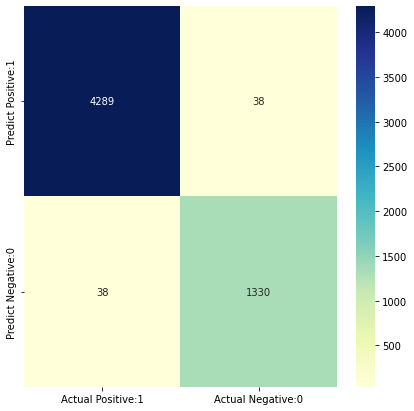

In [31]:
# predict using cross validation
y_pred = cross_val_predict(model_gs, X, y, cv=kf)
# generate the confusion matrix
cm = confusion_matrix(y, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1',
                                           'Actual Negative:0'],
                        index=['Predict Positive:1', 'Predict Negative:0'])
fig, ax = plt.subplots(figsize=(7,7))  
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

* **Missclassifications**:
  * **38 spam email as ham**!
  * 38 ham emails as spam.

<a name="Res-Con"></a>
# **Results and Conclusions**

1. **Multinomial Naive-Bayes** had a testing accuracy of **99.1%**, far better than **null accuracy** (76%).

  Training the Multinomial Naive-Bayes model was done **instantly** and without **any optimization**.

2. **SVC with default settings** (*kernel='rbf', C=1.0*) had a test accuracy of **97.80%**, while with **GridSearch CV minimal hyperparameter optimization** (*kernel='linear', C=10.0*) had a test accuracy of **98.70%**. 

  Hence, GridSearch CV was successful in identifying the parameters that will improve the performance for this particular model.

3. GridSearchCV optimization took **a lot more time** and still produced **lower scores** on most metrics than Multinomial Naive-Bayes!

4. **MNB** had only **10 false negatives** (missclassified spam emails), while **SVM** had **38**!

Cross-Validated score tables for both models reproduced for convinience:

In [33]:
print("Multinomial Naive-Bayes scores")
display(metrics_mnb)
print("\nSupport Vector Machine scores")
display(metrics_svc)

Multinomial Naive-Bayes scores


,split 1,split 2,split 3,split 4,split 5,split 6,split 7,split 8,split 9,split 10,mean
Accuracy Train,0.997073,0.996878,0.997268,0.997659,0.996488,0.997269,0.996879,0.996488,0.997074,0.997659,0.9971
Accuracy,0.989474,0.996491,0.992982,0.987719,0.987719,0.992970,0.989455,0.994728,0.985940,0.987698,0.9905
Precision,0.978102,0.985612,0.971631,0.951389,0.957746,0.978417,0.958042,0.978571,0.963768,0.957447,0.9681
Recall,0.978102,1.000000,1.000000,1.000000,0.992701,0.992701,1.000000,1.000000,0.977941,0.992647,0.9934
F1,0.978102,0.992754,0.985612,0.975089,0.974910,0.985507,0.978571,0.989170,0.970803,0.974729,0.9805
Brier,-0.008841,-0.003908,-0.007594,-0.012228,-0.010736,-0.007029,-0.010069,-0.005235,-0.011261,-0.011476,-0.0088
LogLoss,-0.051975,-0.103158,-0.156741,-0.212865,-0.120420,-0.081957,-0.256788,-0.086767,-0.215555,-0.276938,-0.1563
RocAuc,0.999629,0.998306,0.996983,0.996527,0.998129,0.998454,0.994306,0.998547,0.995941,0.993929,0.9971



Support Vector Machine scores


,split 1,split 2,split 3,split 4,split 5,split 6,split 7,split 8,split 9,split 10,mean
Accuracy Train,0.999805,0.999805,0.999805,0.999805,0.999805,1.000000,0.999805,0.999805,0.999805,0.999805,0.9998
Accuracy,0.987719,0.989474,0.980702,0.987719,0.985965,0.994728,0.987698,0.982425,0.987698,0.985940,0.9870
Precision,0.964286,0.978102,0.963235,0.964286,0.984962,0.985507,0.977941,0.977444,0.977778,0.970588,0.9744
Recall,0.985401,0.978102,0.956204,0.985401,0.956204,0.992701,0.970803,0.948905,0.970588,0.970588,0.9715
F1,0.974729,0.978102,0.959707,0.974729,0.970370,0.989091,0.974359,0.962963,0.974170,0.970588,0.9729
Brier,-0.008271,-0.006647,-0.015584,-0.012415,-0.010890,-0.007486,-0.010939,-0.012557,-0.007851,-0.008864,-0.0102
LogLoss,-0.032459,-0.027403,-0.091418,-0.055072,-0.059202,-0.064476,-0.056582,-0.095373,-0.075688,-0.036401,-0.0594
RocAuc,0.999208,0.999663,0.995196,0.996123,0.997219,0.996756,0.997584,0.996773,0.997606,0.998506,0.9975
